<center><h1> TD N°2 : SVM non linéaire</h1></center>


## Import package

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import time
#Viz
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
#Modélisation 
#Classifier
from sklearn.svm import SVC 
from sklearn.linear_model import SGDClassifier, LogisticRegression
#Metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
#Eval
from sklearn.model_selection import cross_val_score, learning_curve, GridSearchCV, train_test_split
from sklearn_evaluation import plot
from sklearn.preprocessing import StandardScaler


## Function

In [4]:
def plot_predictions(clf, axes):
    
    ''''
    Plot prediction permet de visualiser la frontière de décision d'un SVM avec kernel.
    Elle ne marche qu'avec 2 features (2 dimensions)
    
    IL FAUT également tracer votre X_train avant de faire cette fonction!!
    
    '''
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)
    

#clf = model SVC
#axes = [xlim_min, xlim_max, ylim_min, ylim_max]

## Enoncé TD

#### Exploration and data analysis (EDA)

1) Importer le jeu de données breast cancer disponible dans le module sklearn.datasets<br>
2) Analyser le dataset avec des statistiques descriptives<br>
3) Recoder les variables si nécessaire<br>
4) Faites une première étape de feature selection avec votre analyse statistique<br> 

#### Modélisation binaire

5) Importer les modèles suivants **SGDClassifier, SVC, LogisticRegression**<br>
6) Regarder l'effet du changement de noyau pour la fonction **SVC**<br>
- 6.1) Garder uniquement 2 features pour cette partie<br>
- 6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de décision en fonction du noyau<br>
- 6.3) Varier les autres hyperparamètres en plus du **kernel**<br>

7) Lancer vos modèles sur les features que vous avez gardés avec vos statistiques descriptives( pour **SVC** utiliser plusieurs noyaux)<br>
8) Réaliser une cross-validation afin de déterminer des modèles prometteurs. Ne pas tuner les hyperparamètres<br>
9) Analyser vos résultats (metrics, erreurs de prédictions, ...)<br>
10) Tuner pour obtenir le meilleur modèle et réaliser une prédiction<br>
- 10.1) Analyser les variables importantes de votre modèle



## Description du dataset



<img src="https://www.researchgate.net/profile/Faiza-Khattak/publication/281099329/figure/fig3/AS:284623327252504@1444870897714/Example-images-of-the-breast-cancer-dataset-From-left-to-right-First-three-are.png" alt="image_breast_cancer.png" style="width:800px;"/>
</p>

Le data set breast cancer contient des informations sur la caractéristiques de tumeur bénine ou non.<br>
Les informations sont issues d'images  (exmple ci-dessus) et un docteur à labélisé si la tumeur était bénine ou maligne.

##### Info du dataset

Attribute Information:
- radius (mean of distances from center to points on the perimeter)
- texture (standard deviation of gray-scale values)
- perimeter
- area
- smoothness (local variation in radius lengths)
- compactness (perimeter^2 / area - 1.0)
- concavity (severity of concave portions of the contour)
- concave points (number of concave portions of the contour)
- symmetry
- fractal dimension ("coastline approximation" - 1)
        
Chaque attribut possède 3 informations. La moyenne(mean), l'écart type(standart error) et le maximun("worst")


## Code

## Exploration and data analysis


#### 1) Importer le jeu de données breast cancer disponible dans le module sklearn.datasets

In [5]:
#Load dataset breast cancer
data = load_breast_cancer()

df = pd.DataFrame(data=np.c_[data.data, data.target], 
                  columns=list(data.feature_names) + ['target'])

In [6]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


##### 2) Analyser le dataset avec des statistiques descriptives

- Statistiques univariées
- Statistiques bivariées
- Statistiques multivariées (si vous avez le temps)

In [7]:
# Statistiques descriptives générales
print(df.describe())

       mean radius  mean texture  mean perimeter    mean area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean smoothness  mean compactness  mean concavity  mean concave points  \
count       569.000000        569.000000      569.000000           569.000000   
mean          0.096360          0.104341        0.088799             0.048919   
std           0.014064          0.052813        0.079720             0.038803   
min           0.052630          0.019380        0.000000             0.000000   
25%      

In [8]:
# Informations sur le DataFrame
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [9]:
# Distribution de la variable cible
print(df['target'].value_counts())

target
1.0    357
0.0    212
Name: count, dtype: int64


(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

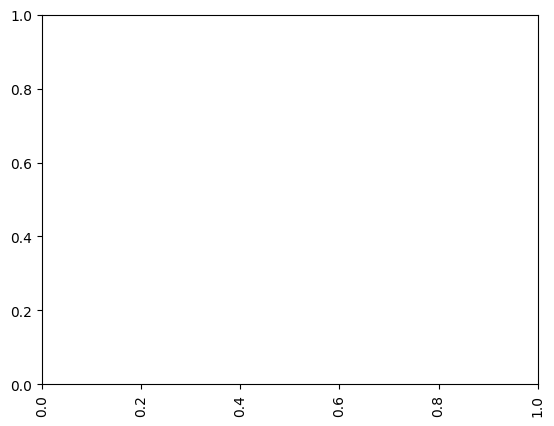

In [10]:
plt.xticks(rotation=90)

In [11]:
# Standardisation des colonnes explicatives (excluant 'target')
sc = StandardScaler()
X_scaled = sc.fit_transform(df.drop(columns='target'))

# Convertir en DataFrame pour conserver les noms des colonnes
X_scaled = pd.DataFrame(X_scaled, columns=df.drop(columns='target').columns)

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]),
 [Text(1, 0, 'mean radius'),
  Text(2, 0, 'mean texture'),
  Text(3, 0, 'mean perimeter'),
  Text(4, 0, 'mean area'),
  Text(5, 0, 'mean smoothness'),
  Text(6, 0, 'mean compactness'),
  Text(7, 0, 'mean concavity'),
  Text(8, 0, 'mean concave points'),
  Text(9, 0, 'mean symmetry'),
  Text(10, 0, 'mean fractal dimension'),
  Text(11, 0, 'radius error'),
  Text(12, 0, 'texture error'),
  Text(13, 0, 'perimeter error'),
  Text(14, 0, 'area error'),
  Text(15, 0, 'smoothness error'),
  Text(16, 0, 'compactness error'),
  Text(17, 0, 'concavity error'),
  Text(18, 0, 'concave points error'),
  Text(19, 0, 'symmetry error'),
  Text(20, 0, 'fractal dimension error'),
  Text(21, 0, 'worst radius'),
  Text(22, 0, 'worst texture'),
  Text(23, 0, 'worst perimeter'),
  Text(24, 0, 'worst area'),
  Text(25, 0, 'worst smoothness'),
  Text(26, 0, 'worst compactne

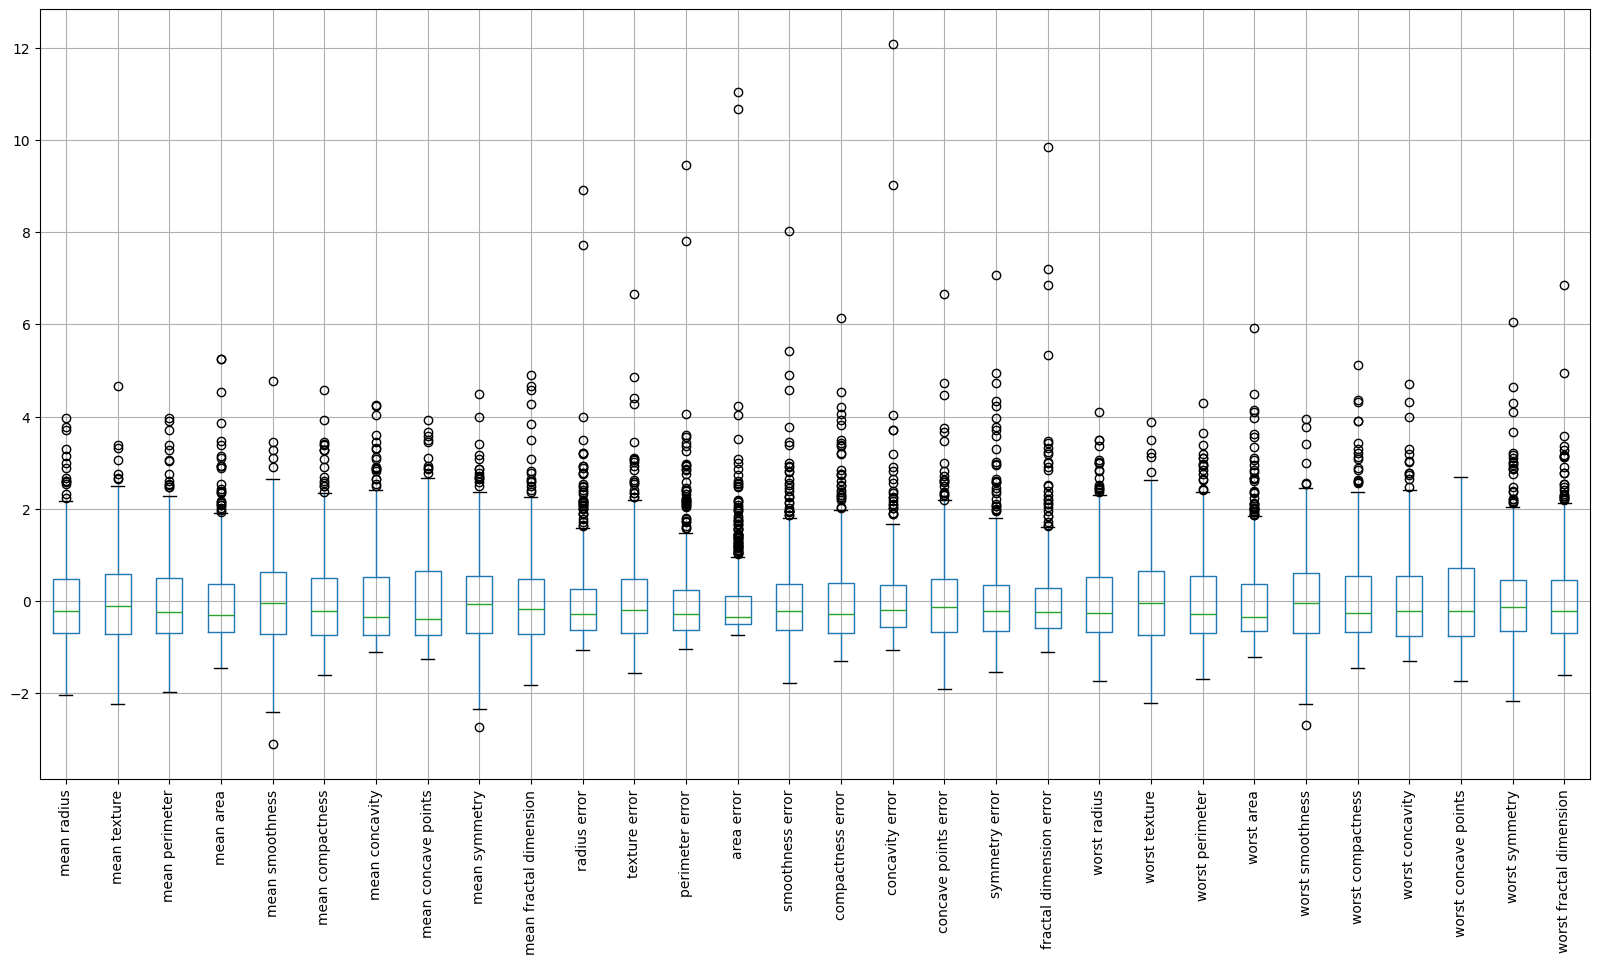

In [12]:
X_scaled.boxplot(figsize=(20, 10),)
plt.xticks(rotation=90)

In [13]:
# Matrice de corrélation
corr = df.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.340956,0.997802,0.999602,0.148510,0.497578,0.645728,0.759702,0.120242,-0.349931,0.550247,-0.144499,0.565520,0.738077,-0.326385,0.264904,0.364555,0.410576,-0.241376,-0.008411,0.978604,0.314911,0.971555,0.978863,0.125789,0.491357,0.596043,0.727265,0.174698,0.044564,-0.732785
mean texture,0.340956,1.000000,0.348142,0.344145,0.024649,0.266499,0.342646,0.306891,0.110130,-0.059303,0.363621,0.450720,0.386813,0.395139,0.037048,0.263591,0.287188,0.238610,0.008945,0.147605,0.366547,0.909218,0.375273,0.368335,0.101401,0.290917,0.339725,0.319235,0.120693,0.116144,-0.461971
mean perimeter,0.997802,0.348142,1.000000,0.997068,0.182923,0.543925,0.681958,0.788629,0.150049,-0.304891,0.560326,-0.137578,0.582789,0.745824,-0.311147,0.308620,0.402277,0.441996,-0.228187,0.032429,0.981244,0.323109,0.978980,0.980864,0.156611,0.534565,0.632106,0.757526,0.199007,0.088961,-0.748496
mean area,0.999602,0.344145,0.997068,1.000000,0.138053,0.488988,0.642557,0.755165,0.113928,-0.358425,0.553388,-0.142469,0.568237,0.741518,-0.327431,0.260362,0.362308,0.406468,-0.243507,-0.012688,0.979258,0.318178,0.971822,0.980264,0.119712,0.485813,0.593736,0.723390,0.170860,0.038758,-0.734122
mean smoothness,0.148510,0.024649,0.182923,0.138053,1.000000,0.678806,0.518511,0.565172,0.542228,0.588465,0.334282,0.091283,0.331360,0.296059,0.338692,0.392455,0.354730,0.438826,0.150740,0.413429,0.203453,0.060645,0.226345,0.191735,0.796085,0.481384,0.429107,0.498868,0.393579,0.511457,-0.371892
mean compactness,0.497578,0.266499,0.543925,0.488988,0.678806,1.000000,0.896518,0.848295,0.552203,0.499195,0.506582,0.047766,0.583520,0.539511,0.127381,0.817875,0.772283,0.732425,0.098388,0.621121,0.542626,0.255305,0.592254,0.531590,0.578902,0.901029,0.837921,0.825473,0.450333,0.688986,-0.609288
mean concavity,0.645728,0.342646,0.681958,0.642557,0.518511,0.896518,1.000000,0.927352,0.446793,0.258174,0.575277,0.051318,0.646199,0.644344,0.070321,0.761230,0.858306,0.774656,0.022753,0.513593,0.682316,0.335866,0.722424,0.676628,0.488775,0.849985,0.938543,0.904938,0.383667,0.541838,-0.733308
mean concave points,0.759702,0.306891,0.788629,0.755165,0.565172,0.848295,0.927352,1.000000,0.423767,0.142659,0.635054,0.008710,0.679841,0.726982,0.016798,0.608388,0.674668,0.758438,-0.028353,0.378374,0.787411,0.300562,0.813960,0.780395,0.490035,0.758309,0.827281,0.937075,0.355477,0.421110,-0.777877
mean symmetry,0.120242,0.110130,0.150049,0.113928,0.542228,0.552203,0.446793,0.423767,1.000000,0.428467,0.337912,0.139124,0.354888,0.288322,0.206106,0.435714,0.367637,0.382736,0.384123,0.402630,0.164552,0.118890,0.190526,0.154462,0.424230,0.440828,0.394481,0.397477,0.710359,0.410069,-0.332567
mean fractal dimension,-0.349931,-0.059303,-0.304891,-0.358425,0.588465,0.499195,0.258174,0.142659,0.428467,1.000000,0.001477,0.157103,0.055309,-0.120333,0.401530,0.481139,0.344007,0.286393,0.314165,0.683800,-0.294540,-0.047791,-0.247456,-0.304927,0.493474,0.403653,0.242611,0.139152,0.295046,0.760771,0.025903


#### 3) Recoder les variables si nécessaire


#### 4) Faites une première étape de feature selection avec votre analyse des statistiques

In [15]:
# Seuil de corrélation
threshold = 0.8

# Sélectionner les colonnes à conserver
upper = corr.where(np.triu(np.ones(corr.shape), k=1).astype(bool))
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

# Garder uniquement les colonnes avec des corrélations inférieures à 80%
df_filtered = df.drop(columns=to_drop)

# Afficher les colonnes conservées
print(df_filtered.columns)

print(df_filtered.shape[1])

Index(['mean radius', 'mean texture', 'mean smoothness', 'mean compactness',
       'mean symmetry', 'mean fractal dimension', 'radius error',
       'texture error', 'smoothness error', 'symmetry error',
       'fractal dimension error', 'worst smoothness', 'worst symmetry',
       'worst fractal dimension', 'target'],
      dtype='object')
15


In [16]:
# Matrice de corrélation
corr = df_filtered.corr(method='spearman')
corr.style.background_gradient(cmap='coolwarm')

,mean radius,mean texture,mean smoothness,mean compactness,mean symmetry,mean fractal dimension,radius error,texture error,smoothness error,symmetry error,fractal dimension error,worst smoothness,worst symmetry,worst fractal dimension,target
mean radius,1.000000,0.340956,0.148510,0.497578,0.120242,-0.349931,0.550247,-0.144499,-0.326385,-0.241376,-0.008411,0.125789,0.174698,0.044564,-0.732785
mean texture,0.340956,1.000000,0.024649,0.266499,0.110130,-0.059303,0.363621,0.450720,0.037048,0.008945,0.147605,0.101401,0.120693,0.116144,-0.461971
mean smoothness,0.148510,0.024649,1.000000,0.678806,0.542228,0.588465,0.334282,0.091283,0.338692,0.150740,0.413429,0.796085,0.393579,0.511457,-0.371892
mean compactness,0.497578,0.266499,0.678806,1.000000,0.552203,0.499195,0.506582,0.047766,0.127381,0.098388,0.621121,0.578902,0.450333,0.688986,-0.609288
mean symmetry,0.120242,0.110130,0.542228,0.552203,1.000000,0.428467,0.337912,0.139124,0.206106,0.384123,0.402630,0.424230,0.710359,0.410069,-0.332567
mean fractal dimension,-0.349931,-0.059303,0.588465,0.499195,0.428467,1.000000,0.001477,0.157103,0.401530,0.314165,0.683800,0.493474,0.295046,0.760771,0.025903
radius error,0.550247,0.363621,0.334282,0.506582,0.337912,0.001477,1.000000,0.309672,0.223469,0.240118,0.348164,0.203760,0.147213,0.111043,-0.616912
texture error,-0.144499,0.450720,0.091283,0.047766,0.139124,0.157103,0.309672,1.000000,0.443640,0.389080,0.309209,-0.023095,-0.119890,-0.048143,-0.019419
smoothness error,-0.326385,0.037048,0.338692,0.127381,0.206106,0.401530,0.223469,0.443640,1.000000,0.473579,0.460478,0.372247,-0.067149,0.129752,0.052193
symmetry error,-0.241376,0.008945,0.150740,0.098388,0.384123,0.314165,0.240118,0.389080,0.473579,1.000000,0.380711,-0.042873,0.283201,0.011133,0.092303


## Modélisation Binaire

#### 5) Importer les modèles suivants SGDClassifier, SVC, LogisticRegression

In [17]:
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier , LogisticRegression

#### 6) Regarder l'effet du changement de noyau pour la fonction SVC

6.1) Garder uniquement **2 features** pour cette partie<br>
6.2) Utiliser la fonction **plot_predictions** pour voir la fonction de décision en fonction du noyau<br>
6.3) Varier les autres hyperparamètres en plus du kernel<br>

In [ ]:
# On garde 2 features uniquement
X = df_filtered.drop(columns='target')
X2 = X[['mean radius', 'mean texture']]
y = df_filtered['target']

In [ ]:
# Split des données
X2_train, X2_test, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)

In [29]:
# Scaling
sc = StandardScaler()

sc.fit(X2_train)

X2_train_sc = sc.transform(X2_train)
X2_test_sc = sc.transform(X2_test)

In [49]:
# Modélisation avec SVM linéaire
SVM_lin = SVC(kernel='linear', C=1)

# Entraînement du modèle
SVM_lin.fit(X2_train_sc, y_train)

SVC(C=1, kernel='linear')

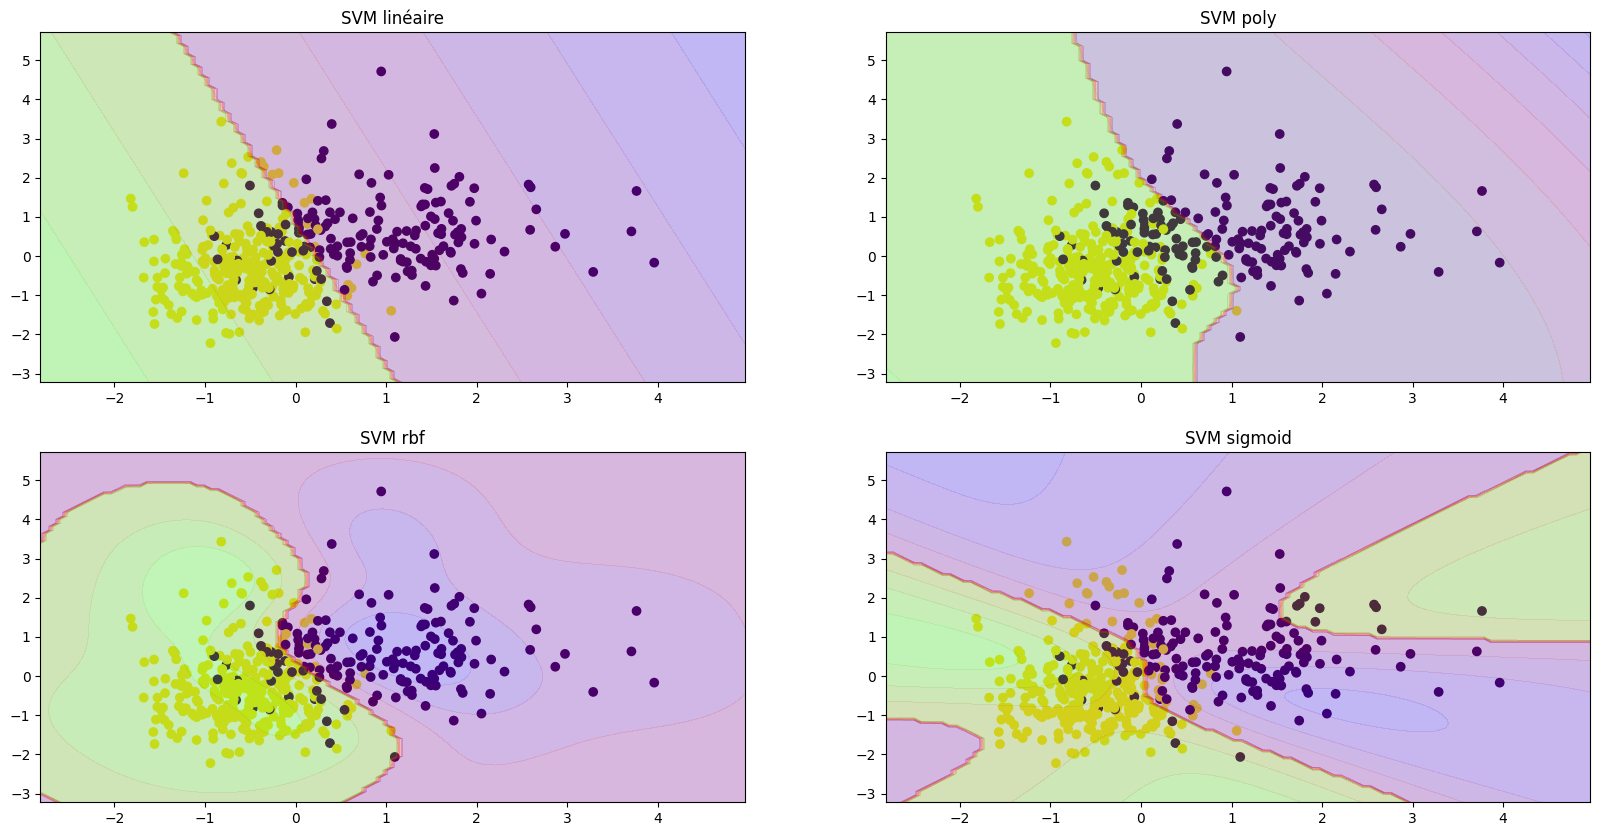

In [71]:
### Plot des frontières de décision en fonction du kernel ###
plt.figure(figsize=(20, 10))

# Le premier plot
axes =  [X2_train_sc[:, 0].min() - 1, X2_train_sc[:, 0].max() + 1, 
        X2_train_sc[:, 1].min() - 1, X2_train_sc[:, 1].max() + 1]
plt.subplot(2, 2, 1)
plt.scatter(X2_train_sc[:, 0], X2_train_sc[:, 1], c=y_train)
plt.title('SVM linéaire')
plot_predictions(SVM_lin, axes)

# Modélisation avec SVM poly
SVM_poly = SVC(kernel='poly', C=1)

# Entraînement du modèle
SVM_poly.fit(X2_train_sc, y_train)

# Plot de la frontière
plt.subplot(2, 2, 2)
plt.scatter(X2_train_sc[:, 0], X2_train_sc[:, 1], c=y_train)
plt.title('SVM poly')
plot_predictions(SVM_poly, axes)

# Modélisation avec SVM rdf
SVM_poly = SVC(kernel='rbf', C=1)

# Entraînement du modèle
SVM_poly.fit(X2_train_sc, y_train)

# Plot de la frontière
plt.subplot(2, 2, 3)
plt.scatter(X2_train_sc[:, 0], X2_train_sc[:, 1], c=y_train)
plt.title('SVM rbf')
plot_predictions(SVM_poly, axes)

# Modélisation avec SVM poly
SVM_sig = SVC(kernel='sigmoid', C=1)

# Entraînement du modèle
SVM_sig.fit(X2_train_sc, y_train)

# Plot de la frontière
plt.subplot(2, 2, 4)
plt.title('SVM sigmoid')
plt.scatter(X2_train_sc[:, 0], X2_train_sc[:, 1], c=y_train)
plot_predictions(SVM_sig, axes)



In [69]:
# Accuracy des modèles SVM
accuracy_lin = SVM_lin.score(X2_test_sc, y_test)
accuracy_poly = SVM_poly.score(X2_test_sc, y_test)
accuracy_rbf = SVM_poly.score(X2_test_sc, y_test)
accuracy_sig = SVM_sig.score(X2_test_sc, y_test)

print(f"Accuracy SVM linéaire: {accuracy_lin:.2f}")
print(f"Accuracy SVM polynomial: {accuracy_poly:.2f}")
print(f"Accuracy SVM RBF: {accuracy_rbf:.2f}")
print(f"Accuracy SVM sigmoïde: {accuracy_sig:.2f}")

Accuracy SVM linéaire: 0.90
Accuracy SVM polynomial: 0.92
Accuracy SVM RBF: 0.92
Accuracy SVM sigmoïde: 0.83


In [ ]:
C = [0.001, 0.01, 0.1, 1, 5, 10]

 
for i, val in enumerate(C):
    print(i)
    ax = plt.subplots(3, 2, i + 1)
    SVM_C = SVC(kernel='poly', C=val)
    SVM_C.fit(X2_train_sc, y_train)
    plt.scatter(X2_train_sc[:, 0], X2_train_sc[:, 1], c=y_train)
    plot_predictions(SVM_C, axes)
    plt.title(f'SVM poly C={val}')

0


TypeError: subplots() takes from 0 to 2 positional arguments but 3 were given

#### 7) Lancer vos modèles sur les features que vous avez gardés avec vos statistiques descriptives( pour **SVC** utiliser plusieurs noyaux)

On utilise un dataset avec autant features que vous souhaitez maintenant

In [90]:
# Split des données avec les features initiales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling

sc = StandardScaler()

sc.fit(X_train)

X_train_sc = sc.transform(X_train)
X_test_sc = sc.transform(X_test)

In [83]:
SVC = SVC(kernel='poly', C=1)

# Entraînement du modèle
SVC.fit(X_train_sc, y_train)

NameError: name 'X_train_sc' is not defined

#### 8) Réaliser une cross-validation afin de déterminer des modèles prometteurs. Ne pas tuner les hyperparamètres 

#### 9) Analyser vos résultats (metrics, erreurs de prédictions, ...)

#### 10) Tuner pour obtenir le meilleur modèle et réaliser une prédiction


<center><h4> Alors, êtes-vous devenu un bon médcin et savez vous détecter un cancer??</h4></center>